In [5]:
#importing libraries
from dtreeviz.trees import *
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


In [6]:
#loading dataset
iris = load_iris()
X = iris.data
y = iris.target

In [7]:
#splitting data in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
#defining the model, applying the fit method
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [9]:
#defining the regression model, applying the fit method
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_2 = model.predict(X_test)

In [10]:
#Creating the tree visualization
viz = dtreeviz(clf, x_data = X, y_data = y, target_name = 'class', feature_names = iris.feature_names, class_names = list(iris.target_names), title = 'Decision Tree - Iris dataset')

In [11]:
viz

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

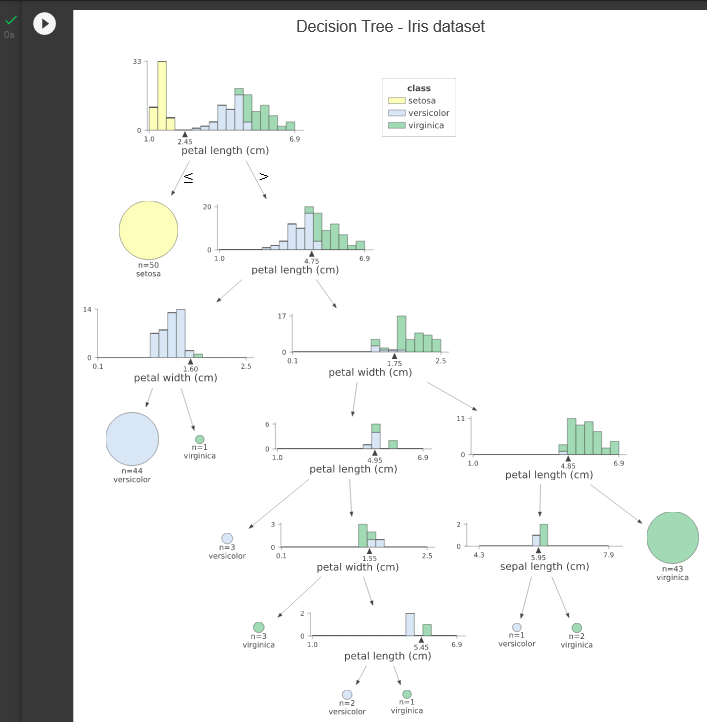

In [52]:
from PIL import Image
Image.open("decisiontree.png") 


Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


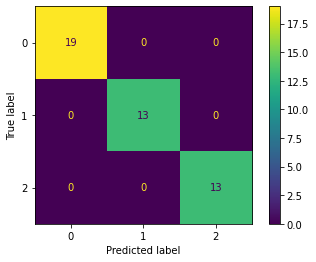

In [12]:
#confusion matrix
plot_confusion_matrix(clf, X_test, y_test)

In [13]:
#recall, precision and f1 score
print('Recall = ' + str(recall_score(y_pred, y_test, average = 'micro')))
print('Precision = ' + str(precision_score(y_pred, y_test, average = 'macro')))
print('F1 = ' + str(f1_score(y_pred, y_test, average = 'weighted')))

Recall = 1.0
Precision = 1.0
F1 = 1.0


In [14]:
#Regression interpretability
print('Mean squared error = ' + str(mean_squared_error(y_pred_2, y_test)))
print('Mean absolute error = ' + str(mean_absolute_error(y_pred_2, y_test)))
print('Root mean squared error = ' + str(np.sqrt(mean_squared_error(y_pred_2, y_test))))

Mean squared error = 0.0
Mean absolute error = 0.0
Root mean squared error = 0.0


<Figure size 720x720 with 0 Axes>

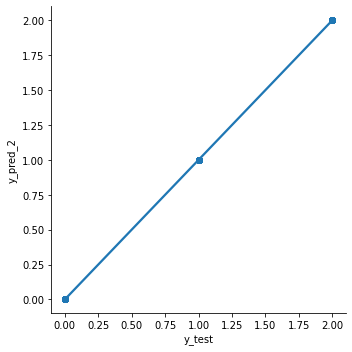

In [15]:
#Plotting interpretation
plt.figure(figsize = (10, 10))
predictions = pd.DataFrame(y_pred_2, columns = ['y_pred_2'])
predictions['y_test'] = y_test
sns.lmplot(data = predictions, x = 'y_test', y = 'y_pred_2')

In [18]:
#installing lime
!pip install lime

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283845 sha256=35f017d01d75b07cb60b377927bd1e172ac04f974e9e76e2131a151a60ded806
  Stored in directory: c:\users\pulbe\appdata\local\pip\cache\wheels\ca\cb\e5\ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


You should consider upgrading via the 'c:\users\pulbe\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [19]:
#importing lime_tabular
from lime import lime_tabular

In [20]:
#importing dataset as a dataframe and cleaning it
df = pd.read_csv('Heart.csv')
df = df.drop(['Unnamed: 0', 'ChestPain', 'Thal'], axis = 1)
df['AHD'] = df['AHD'].map({'No' : 0, 'Yes' : 1})
df = df.dropna()

In [21]:
#defining X and y vector
X = df.iloc[:, :-1].values
y = df['AHD'].values

In [22]:
#splitting data in test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
#defining the regression model, applying the fit method
model = DecisionTreeRegressor()
model.fit(X_train, y_train)


DecisionTreeRegressor()

In [24]:
#explanation using lime_tabular
explainer = lime_tabular.LimeTabularExplainer(X_train,
                                              feature_names = list(df.iloc[:, :-1].columns),
                                              class_names = ['target'],
                                              verbose = True, mode = 'regression')

In [25]:
#visualizing the explanation
exp = explainer.explain_instance(X_test[2], model.predict)

Intercept 0.4952933331283175
Prediction_local [0.7178828]
Right: 1.0


In [26]:
#plotting explanation
exp.show_in_notebook(show_table = True, show_all = False)

In [27]:
#saving as a html file
exp.save_to_file('line.html')

In [2]:
#instaling shap
!pip install shap

You should consider upgrading via the 'c:\users\pulbe\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [28]:
#importing shap
import shap
shap.initjs()

In [29]:
#creating the explainer
explainer = shap.Explainer(model.predict, X_train, feature_names=list(df.columns)[: -1])

In [30]:
#getting shap values
shap_values = explainer(X_test)

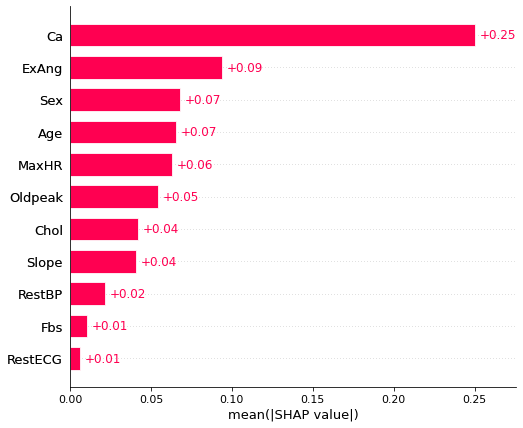

In [31]:
#plotting shap bar
shap.plots.bar(shap_values, max_display = 14)

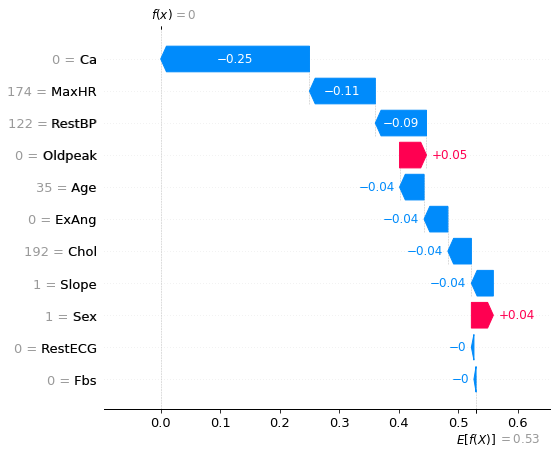

In [32]:
#plotting shap waterfall
shap.plots.waterfall(shap_values[0], max_display = 14)

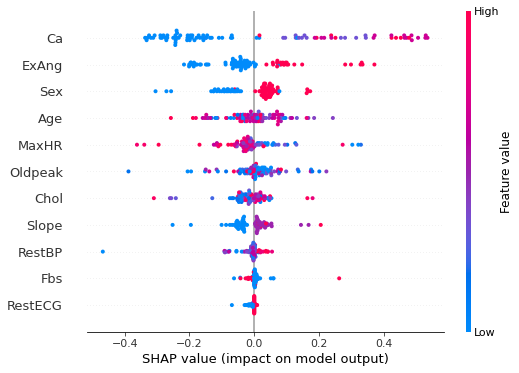

In [33]:
#plotting shap beeswarm
shap.plots.beeswarm(shap_values, max_display=14)

In [34]:
#plotting force_plot
shap.force_plot(shap_values[0], X_test[0])

# Hyperparameter tuning

In [35]:
#importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [36]:
#defining parameters
tuned_parameters = {
    'kernel' : ['rbf'],
    'gamma' : [1e-3, 1e-4],
    'C' : [1, 10, 100, 1000]
}

In [37]:
#instantianting GridSearch
clf = GridSearchCV(SVC(), tuned_parameters, scoring = 'recall')

In [38]:
#fitting on train
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='recall')

In [39]:
#visualizing best parameters
print('Best parameters set found on development set : ')
print(clf.best_params_)

Best parameters set found on development set : 
{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}


Random search

In [40]:
#importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [47]:
#defining distribution
distributions = dict(C=uniform(loc=0, scale = 4), penalty = ['l2'])

In [48]:
#instantiating the model
clf = RandomizedSearchCV(LogisticRegression(max_iter = 100000), distributions, random_state = 42)

In [49]:
#searching best parameters
search = clf.fit(X_train, y_train)
print(search.best_params_)

{'C': 3.8028572256396647, 'penalty': 'l2'}
